##Alban Kuka

##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [ ]:
voters = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv')

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



##Purpose of My Project / The Goal / The Importance of This Notebook
- The purpose of this project is to get a feel for non-specific, generalized demographic data between the years provided in the dataframe so we can see how population rates have changed between the years within these states as well as the potential ages since individuals become registered voters at a specific adult age of 18 for people who are proactive.
- The goal is to display national and state data that references or alludes to assumptions about simple demographics. although this data does not contain any demeographics we can make assumptions that the lowest state average compared to the highest state average of registered voters leads to a population difference and even an age gap or even perhaps different populations of younger individuals as compared to older individuals who have an drastically high chance of being registered to vote
- It is important for someone to read this notebook because anyone who is interested in political actions, as well as the participation of U.S. citizens who take the effort to become registered voters not only for presidential elections but also state and local elections of politicians. It is important to see the difference in voter participation in different states to see how well someone can allocate and plan their political campaign.

In [ ]:
#Research Questions:

## Research Question 1:
What can the total number of registered voters in each year(2016 & 2020) say about the simple demographics(age,location,population) of registered voters within the given states of this dataframe?

##Research Question 2:
How does the maximumn value of the state with the highest average of registered voters compare to the minimum value of the state with the lowset average of registered voters?

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [ ]:
voters.head(5)
#Varible Explanation below

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


##Variable Explanation
Varible names: Jurisdiction, Year, Month, New registered voters. Jurisdiction represents 11 differet U.S. states with the addition of Washington, D.C
displaying the amount of individuals who registered to vote in early 2020 and how many registered to vote in 2016 under the variable "Year"
For "Month" there is data from January through April for all jurisdictions. For 5 out of 12 jurisdictions there is data also spanning till May.
"New registered voters" are the amount of people who are registered to vote in each jurisdiction during each month at the beginning of a specific year.

Check for any missing data data. (1 point)

In [ ]:
voters.isnull().values.any()

False

Check your data types. (1 point)

In [ ]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [ ]:
voters = voters.rename(columns={"Jurisdiction":"NAME"})

In [ ]:
voters = voters.rename(columns={"New registered voters":"registered_voters"})

In [ ]:
voters.head()

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Explain any potential limitations to your data (2 points)

##Potential Limitations
Some potential limitations to the data are the fact that it lacks specific demographics of these voters, we dont get to analyze many details on voters
themselves but just sheer quantity and volume so it may lead to a broad understanding of registered voter analysis.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [ ]:
voters[['NAME','Year','Month','registered_voters']].sort_values(by='registered_voters',ascending=False).head(1)

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

In [ ]:
voters['registered_voters'].mean()

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [ ]:
high_voters = voters.loc[voters.registered_voters>48223.46226415094]

In [ ]:
high_voters
#happened 93 times where voter registration was higher than the above average

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


How many times did each state go above the national average for new voter registration? (2 points)



In [ ]:
high_voters.NAME.value_counts()

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [ ]:
voters.groupby('NAME')['registered_voters'].mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

In [ ]:
totalvoters = voters[['NAME','registered_voters']].reset_index()

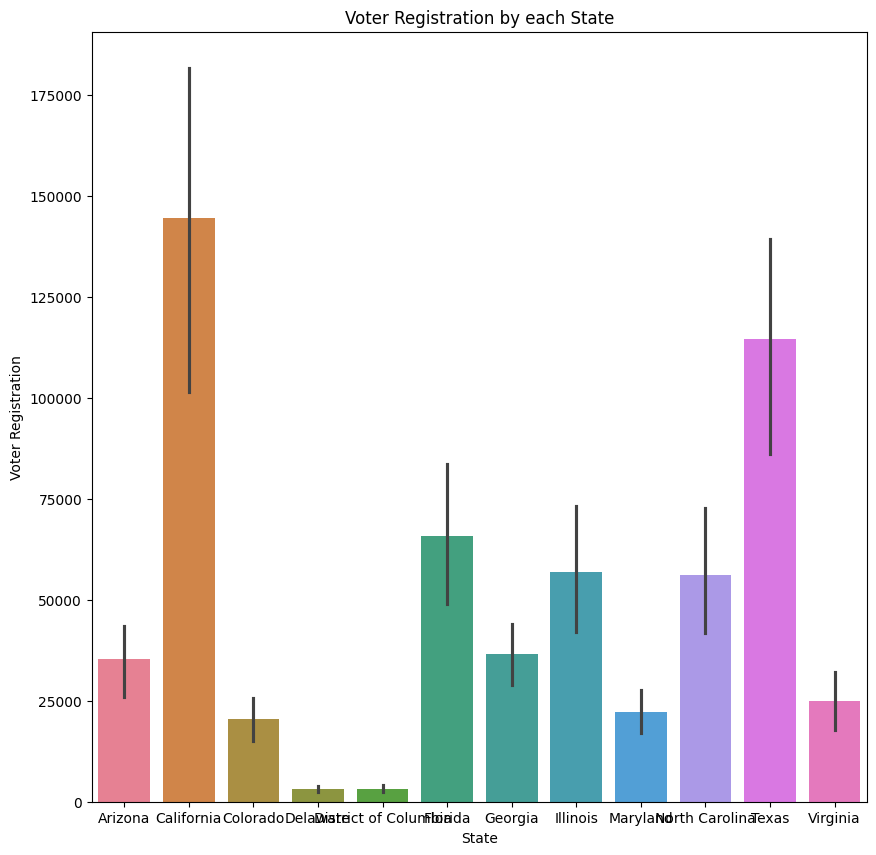

In [67]:
plt.figure(figsize=(10,10))
sns.barplot(totalvoters,x='NAME',y='registered_voters',hue ='NAME' )
plt.xlabel('State')
plt.ylabel('Voter Registration')
plt.title('Voter Registration by each State')
plt.show()
#we can see that larger states in general have more voter registration as compared to smaller states. California, Florida, and Texas all have the highest
#volume of registered voters

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

In [ ]:
colors=['#0DECC7','#EEE712','#12ABEE','#F452DE','#74DD1C']

In [ ]:
yearvoters = voters[['Year','registered_voters','Month']].reset_index()

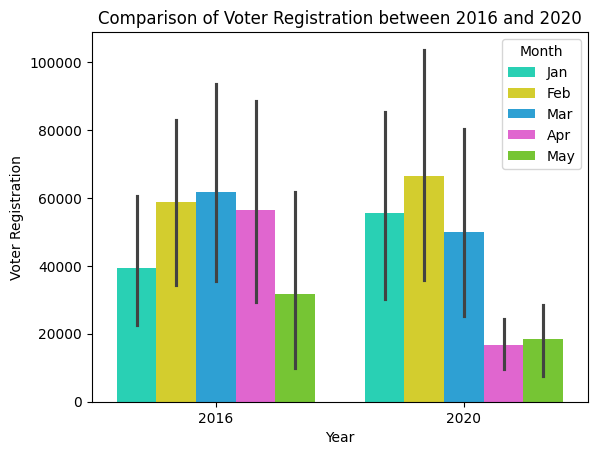

In [68]:
sns.barplot(yearvoters,x='Year',y='registered_voters',palette=colors, hue='Month')
#I notice that the data is bell shaped and has this arc that starts from low to high and back down to low meaning that the middle months see more
#voter registration
plt.ylabel('Voter Registration')
plt.xlabel('Year')
plt.title('Comparison of Voter Registration between 2016 and 2020')
plt.show()
#I notice that the months of may and april have a lower voter registration in 2020 most lilkely due to Covid-19 related issues starting in May, but
#in 2016 voter registration is quite steady and peaks in March of 2016

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

In [ ]:
color=['#20DB0E','#E22C16']

<ipython-input-66-8ef0eed172c4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(yearvoters,x='Year',y='registered_voters', palette=color)


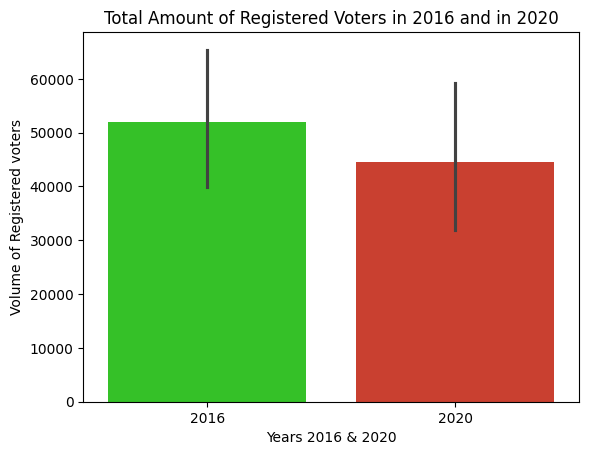

In [ ]:
sns.barplot(yearvoters,x='Year',y='registered_voters', palette=color)
plt.xlabel('Years 2016 & 2020')
plt.ylabel('Volume of Registered voters')
plt.title('Total Amount of Registered Voters in 2016 and in 2020')
plt.show()

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [ ]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 11.83 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

Set our continental US bounding box to us for the next questions. (2 points)

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

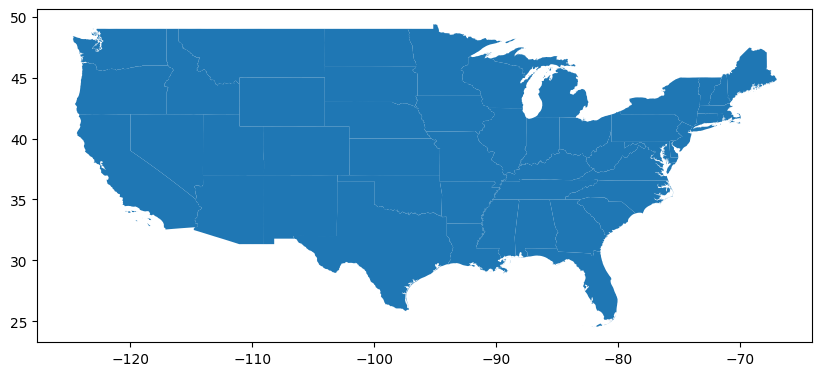

In [ ]:
bbox = states.cx[minx:maxx, miny:maxy]
bbox.plot(figsize=(10, 10))
plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [69]:
avgvoterstate = voters.groupby('NAME')['registered_voters'].mean().sort_values(ascending=False)

In [ ]:
avgvoterstate

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125
Illinois,56840.375
North Carolina,56040.800
Georgia,36604.125
Arizona,35311.500
Virginia,24845.200
Maryland,22133.500


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [ ]:
bbox.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [ ]:
voters.columns

Index(['NAME', 'Year', 'Month', 'registered_voters'], dtype='object')

In [ ]:
mapping_voters = bbox.merge(voters, on='NAME', how='inner')

Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

In [ ]:
registeredstates = states[states['STUSPS'].isin(['CA','TX','FL','IL','NC','GA','AR','VA','MD','CO','DE','DC'])]

<Figure size 2500x1500 with 0 Axes>

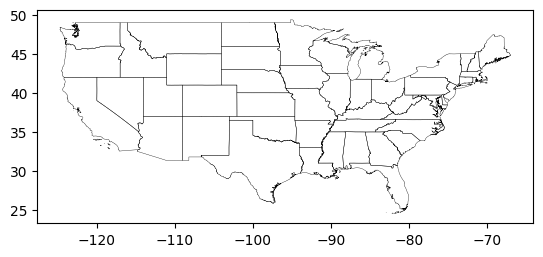

In [ ]:
fig = plt.figure(figsize=(25,15))
bbox.boundary.plot(linewidth=.25,color='black')
plt.show()

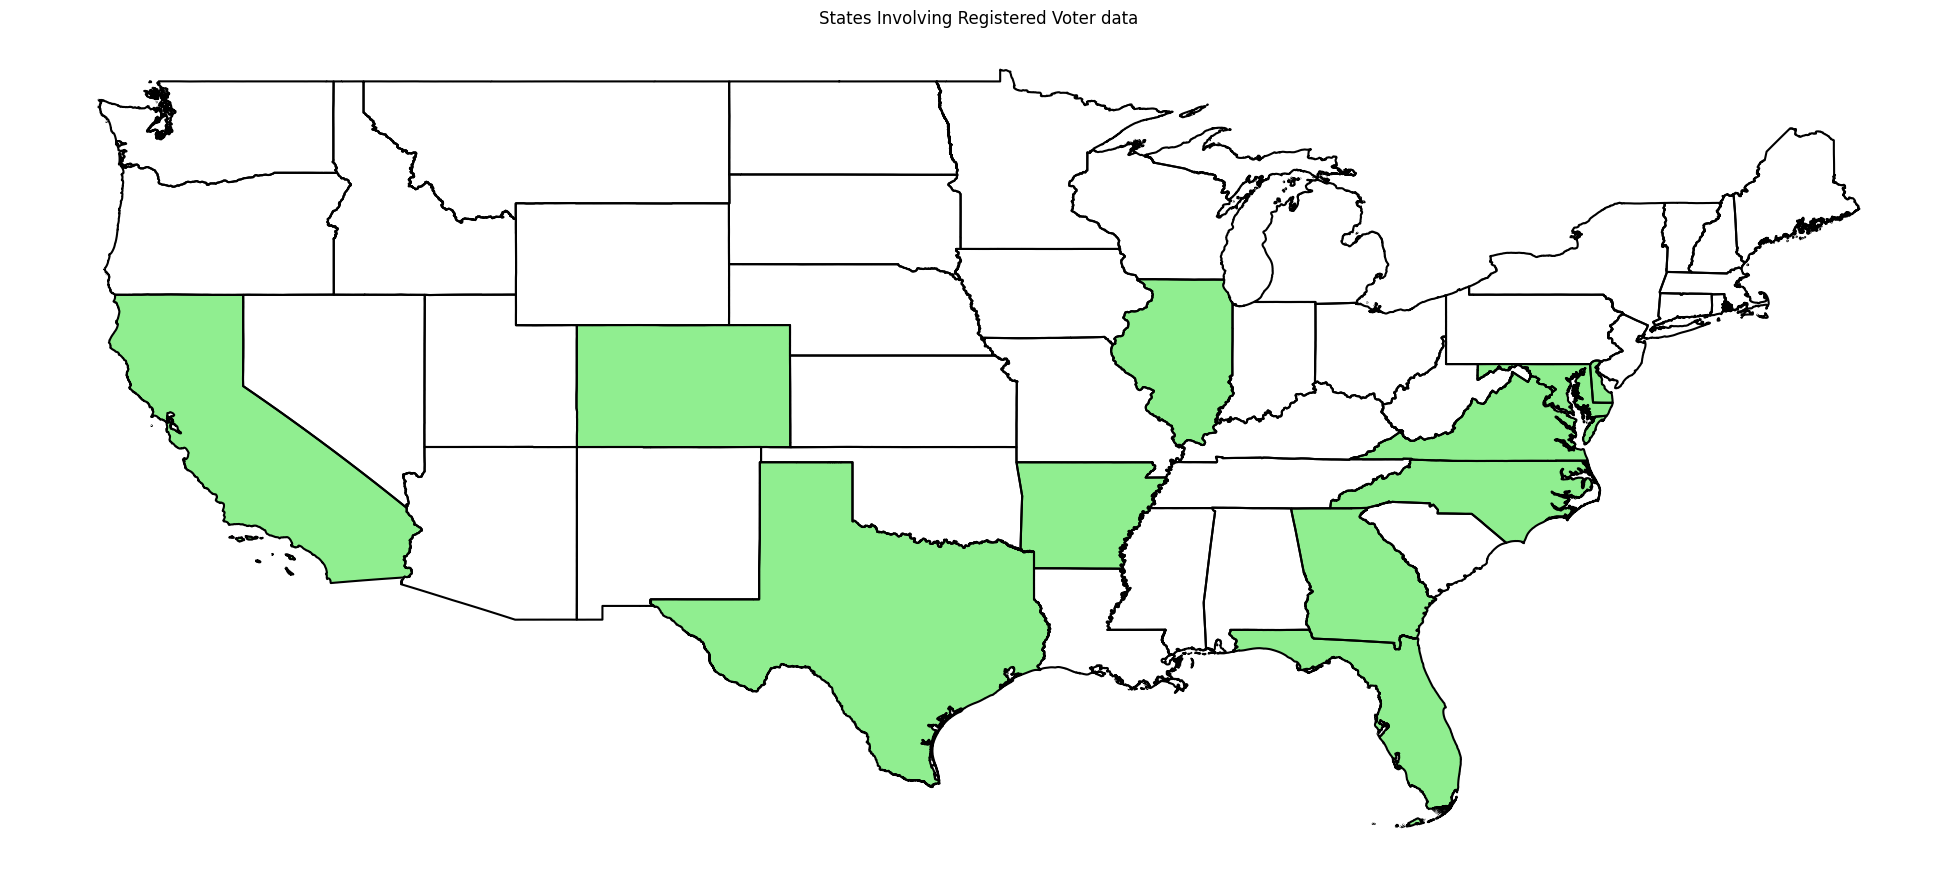

In [ ]:
us_map=bbox.boundary.plot(figsize=(25,15),color='black')
registeredstates.plot(ax=us_map,color='lightgreen',linewidth=.25)
us_map.axis("off")
plt.title('States Involving Registered Voter data')
plt.show()

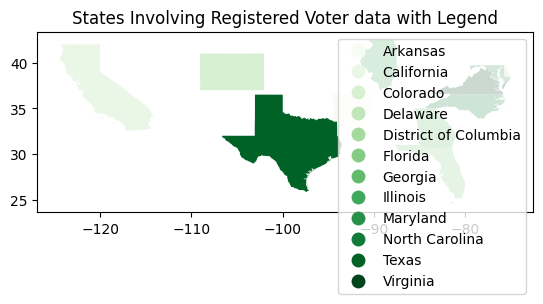

In [ ]:
fig=plt.figure(1)
ax=fig.add_subplot()
registeredstates.plot(column="NAME",ax=ax,legend=True,cmap="Greens")
plt.title('States Involving Registered Voter data with Legend')
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


##Conclusion Section

##Insights
some insights and outcomes of this notebook show that the year 2016 had more overall votes as compared to 2020, this could be for a number of reasons such as: presidential candidates, and viruses like covid impacting registered voters in 2020. Most noticeable is that california had the most overall registered voters in both years and the highest average out of all other states. California being a fairly large state in land mass and also being the most populated state in the entire United states as of lately proves that it would make sense that population of younger individuals would be a contributing factor to the volume of registered voters in California.

##Suggestions
some suggestions I would give to my client are that Government statistics are extremely important so being able to analyze local governments and states participation in politics is crucial. I would suggest that the amount of registered voters has a correlation with state parties such as the general assumption that California and New York are usually Democratic states, so the correlation would be that states with extremely high amounts of registered voters tend to be democratic but in this case Texas is quite large and tends to be the opposite. We can make the corelation that larger states have higher amounts of registered voters according to our data. Last suggestion would be that the months of February and March seem to see the highest amount of registered voters, so make sure to expect a lot of new registrations within those two months as a trend.

##Possible Next Steps
A next step I would take if I was continuting this project would be to have more specific data on these voters especially demographic data so we could make further assumptions on forecasting future outcomes within major cities. Another aspect I woudld add is more information on specific counties within the United States because a lot of counties differ in the amount of registered voters as we usually see when presidential elections start rolling around, different counties with larger populations affect the outcomes towards state classification of either red or blue. So basically being able to have more specific data would be a great aspect to add to this project as it will increase the amount of research that can be done.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [70]:
#Alban Kuka